In [25]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/agricultural-raw-material-prices-19902020/agricultural_raw_material.csv


In [2]:
# Read csv file
df = pd.read_csv("/kaggle/input/agricultural-raw-material-prices-19902020/agricultural_raw_material.csv")


In [3]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [4]:
# check null values
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [5]:
# for regex if this is ``True`` then `to_replace` *must* be a string.
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)

In [6]:
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr90,482.34,NaN,236,NaN,1.83,NaN,1071.63,NaN,161.20,...,312.36,NaN,0.84,NaN,120.66,NaN,218.76,NaN,829.29,NaN
1,May90,447.26,7.27,234,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec19,NaN,NaN,NaN,NaN,1.67,1.21,NaN,NaN,272.80,...,500.37,0.22,1.66,7.79,NaN,NaN,NaN,NaN,875.00,0.00
357,Jan20,NaN,NaN,NaN,NaN,1.74,4.19,NaN,NaN,272.40,...,499.64,0.15,1.68,1.20,NaN,NaN,NaN,NaN,875.00,0.00
358,Feb20,NaN,NaN,NaN,NaN,1.69,2.87,NaN,NaN,270.56,...,496.28,0.67,1.61,4.17,NaN,NaN,NaN,NaN,875.00,0.00
359,Mar20,NaN,NaN,NaN,NaN,1.49,11.83,NaN,NaN,276.93,...,507.96,2.35,1.50,6.83,NaN,NaN,NaN,NaN,875.00,0.00


In [7]:
df.dropna(inplace=True)

In [8]:
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Feb17,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00
323,Mar17,1059.60,2.92,1016.00,11.36,1.91,1.60,1454.83,6.34,263.48,...,483.27,0.01,2.35,13.28,160.05,1.57,300.42,4.52,875.00,0.00
324,Apr17,991.12,6.46,1044.00,2.76,1.92,0.52,1404.98,3.43,270.34,...,495.87,2.61,2.21,5.96,159.84,0.13,306.60,2.06,875.00,0.00
325,May17,1019.95,2.91,1112.50,6.56,1.95,1.56,1433.47,2.03,265.28,...,486.59,1.87,2.10,4.98,159.84,0.00,306.60,0.00,875.00,0.00


In [9]:
#Converting string month data into numerical
df.Month  = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)

In [10]:
# setting Month to index
df.set_index("Month",inplace=True)

In [11]:
df

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,1.88,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00
2017-03-01,1059.60,2.92,1016.00,11.36,1.91,1.60,1454.83,6.34,263.48,0.01,...,483.27,0.01,2.35,13.28,160.05,1.57,300.42,4.52,875.00,0.00
2017-04-01,991.12,6.46,1044.00,2.76,1.92,0.52,1404.98,3.43,270.34,2.60,...,495.87,2.61,2.21,5.96,159.84,0.13,306.60,2.06,875.00,0.00


In [12]:
# Getting the columns
df.columns

Index(['Coarse wool Price', 'Coarse wool price % Change', 'Copra Price',
       'Copra price % Change', 'Cotton Price', 'Cotton price % Change',
       'Fine wool Price', 'Fine wool price % Change', 'Hard log Price',
       'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326 entries, 1990-05-01 to 2017-06-01
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             326 non-null    object 
 1   Coarse wool price % Change    326 non-null    object 
 2   Copra Price                   326 non-null    object 
 3   Copra price % Change          326 non-null    object 
 4   Cotton Price                  326 non-null    float64
 5   Cotton price % Change         326 non-null    object 
 6   Fine wool Price               326 non-null    object 
 7   Fine wool price % Change      326 non-null    object 
 8   Hard log Price                326 non-null    float64
 9   Hard log price % Change       326 non-null    object 
 10  Hard sawnwood Price           326 non-null    float64
 11  Hard sawnwood price % Change  326 non-null    object 
 12  Hide Price                    326 non-null   

**Now I have cleaned data without any null value**

In [14]:
# Convert data df into float type
df = df.astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326 entries, 1990-05-01 to 2017-06-01
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             326 non-null    float64
 1   Coarse wool price % Change    326 non-null    float64
 2   Copra Price                   326 non-null    float64
 3   Copra price % Change          326 non-null    float64
 4   Cotton Price                  326 non-null    float64
 5   Cotton price % Change         326 non-null    float64
 6   Fine wool Price               326 non-null    float64
 7   Fine wool price % Change      326 non-null    float64
 8   Hard log Price                326 non-null    float64
 9   Hard log price % Change       326 non-null    float64
 10  Hard sawnwood Price           326 non-null    float64
 11  Hard sawnwood price % Change  326 non-null    float64
 12  Hide Price                    326 non-null   

# **Q.1 what is the highest and lowest price achieved for Coarse wool and what was the respective month?**

In [15]:
# Importing to matplotlib librarey and setting the style to dark background.
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [16]:
# maximum Coarse wool Price
df[df['Coarse wool Price']==df['Coarse wool Price'].max()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
2012-02-01,1391.47,8.75,945.0,2.07,2.22,0.45,1560.82,3.78,374.98,3.29,...,612.3,0.44,4.0,10.19,142.61,1.6,271.01,3.61,780.34,0.22


In [17]:
# minimum Coarse wool Price
df[df['Coarse wool Price']==df['Coarse wool Price'].min()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1999-09-01,247.09,2.85,421.0,2.32,1.09,2.68,623.26,1.23,202.78,2.19,...,455.51,3.11,0.54,3.57,158.89,0.3,314.87,6.31,544.56,6.47


**The highest price of Coarse wool was 1391.47 on Feb 2012** 

**The lowest price is 247.09 on Sept 1999**

# **Q.2 Show Coarse wool price and % change visualization**

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

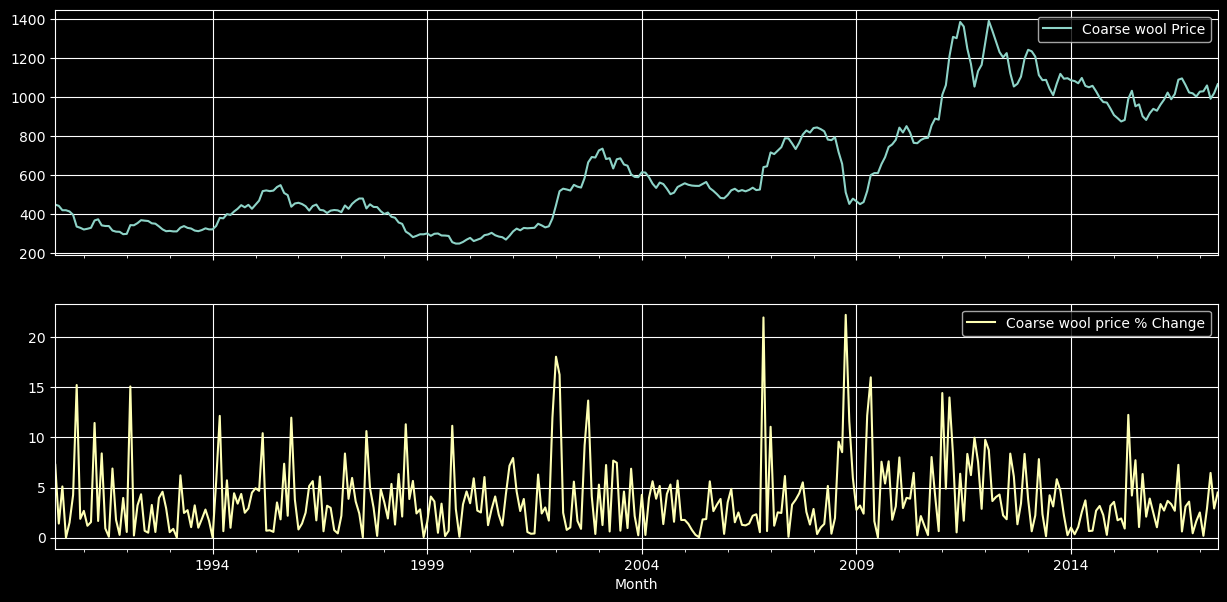

In [18]:
# # visualizing  the production data of Coarse Wool
df[['Coarse wool Price', 'Coarse wool price % Change']].plot(figsize=(15,7),
                            subplots=True,grid=True)

# **Q.3 what is the highest and lowest price achieved for Copra and what was the respective month?**

In [19]:
# maximum Copra Price
df[df['Copra Price']==df['Copra Price'].max()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
2011-02-01,1060.91,4.89,1503.0,11.0,4.7,19.29,1633.11,5.4,328.63,4.22,...,588.69,0.72,6.26,13.41,150.29,1.43,262.96,9.89,885.82,0.77


In [20]:
# minimum Copra Price
df[df['Copra Price']==df['Copra Price'].min()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
2001-03-01,315.36,2.65,182.0,5.7,1.2,9.77,688.23,6.14,166.15,4.2,...,421.06,4.2,0.57,5.0,159.95,6.08,263.49,9.08,616.72,3.66


**The highest price of Copra was 1503 on Feb 2011 and lowest price is 182 on March 2001**

# **Q.4 Show Copra price and % change visualization .**

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

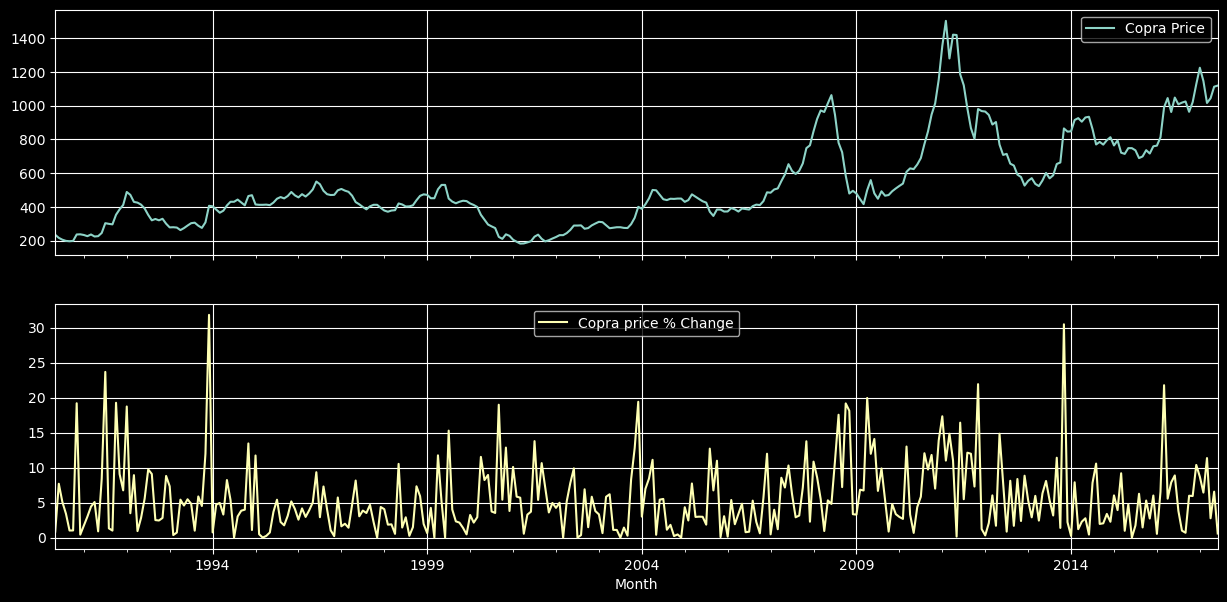

In [21]:
# visualizing  the production data of Copra
df[['Copra Price','Copra price % Change']].plot(figsize=(15,7),subplots=True,grid=True)

# **Q.5 what is the highest and lowest price achieved for Cotton and what was the respective month?**

In [22]:
# maximum cotton price
df[df['Cotton Price']==df['Cotton Price'].max()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
2011-03-01,1209.44,14.0,1280.0,14.84,5.06,7.66,1702.98,4.28,334.76,1.87,...,592.22,0.6,5.42,13.42,150.1,0.13,270.59,2.9,909.63,2.69


In [23]:
# minimum cotton price
df[df['Cotton Price']==df['Cotton Price'].min()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
2001-10-01,330.29,3.01,195.0,7.14,0.82,9.89,441.98,15.68,149.64,4.27,...,404.02,1.9,0.54,6.9,144.92,9.63,274.31,3.04,440.56,4.7


**The highest price of Cotton was 5.06 on March 2011 and lowest price is 0.82 on October 2001**

# **Q.6 Show Cotton price and % change visualization .**

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

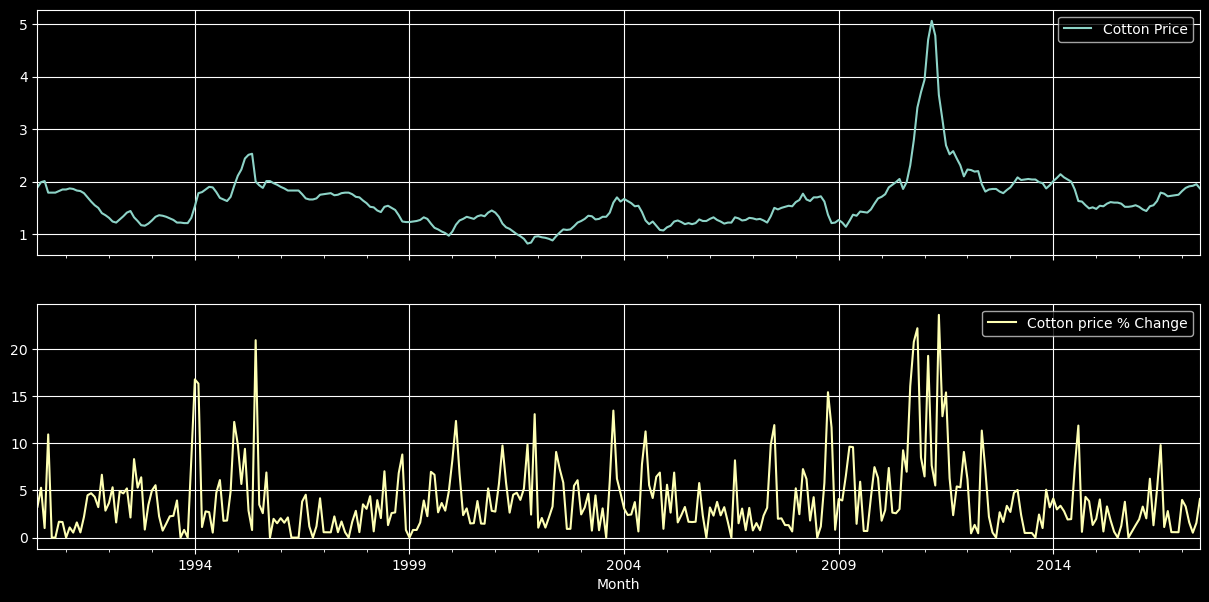

In [24]:
# visualizing  the production data of Copra
df[['Cotton Price','Cotton price % Change']].plot(figsize=(15,7),subplots=True,grid=True)


***I can see that in 2012 cotton price and its percentaage are hightest during 1990 to  2020***